This is a notebook meant for providing an example on how to run MAPSIM simulations for CCAT using the framework built for this module. 

In [2]:
import sys
(sys.path).insert(1,'/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish') #change to path for the downloaded module

import mapsims
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt
from pixell import enmap, enplot, reproject, utils, curvedsky
from ad_fns import *
from astropy.io import fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ccat_models import ccat_noise as CCAT_noise
import scipy.optimize as op

NSIDE = 128
lat_lmax = 1500
pysm_string = "d0,s0"

In [4]:
cmb = mapsims.SOPrecomputedCMB(
        num=0,
        nside=NSIDE,
        lensed=False,
        aberrated=False,
        has_polarization=True,
        cmb_set=0,
        cmb_dir="/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish/mapsims/tests/data",
        input_units="uK_CMB",
    )

Note that when specifying the noise object, the noise model must be specified to be "CcatLatv2b" if you wish to simulate any CCAT channel. 

In [5]:
noise = mapsims.SONoiseSimulator(
            nside=NSIDE,
            return_uK_CMB = True,
            sensitivity_mode = "baseline",
            apply_beam_correction = False,
            apply_kludge_correction = False,
            homogeneous=False,
            rolloff_ell = 50,
            ell_max = lat_lmax,
            survey_efficiency = 1.0,
            full_covariance = False,
            LA_years = 5,
            LA_noise_model = "CcatLatv2b",
            elevation = 50,
            SA_years = 5,
            SA_one_over_f_mode = "pessimistic"
        )

In [6]:
chs = ["tube:LC1","tube:LC2","tube:LC3"]

final = []

for ch in chs:
    simulator = mapsims.MapSim(
        channels=ch,
        nside=NSIDE,
        unit="uK_CMB",
        pysm_output_reference_frame="C",
        pysm_components_string=pysm_string,
#            output_filename_template = filename,
        pysm_custom_components={"cmb": cmb},
        other_components={"noise": noise},
    )
    output_map_full = simulator.execute()

#Now Apodize
    for det in output_map_full.keys():
        for pol in np.arange(output_map_full[det].shape[0]):
            output_map_full[det][pol] = apodize_map(output_map_full[det][pol])
        
    final.append(output_map_full)


/home/pfg44/.local/lib/python3.6/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/pfg44/.local/lib/python3.6/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/pfg44/.local/lib/python3.6/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_u_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/pfg44/.local/lib/python3.6/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/pfg44/.local/lib/python3.6/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/sy

FileNotFoundError: [Errno 2] No such file or directory: 'mapsims/data/simonsobs_instrument_parameters_2020.06'

In [6]:
final = np.array(final)

/home/pfg44/.local/lib/python3.6/site-packages/healpy/visufunc.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pylab.draw()
/home/pfg44/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


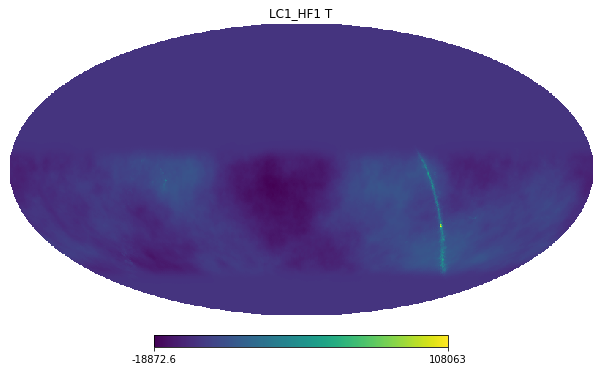

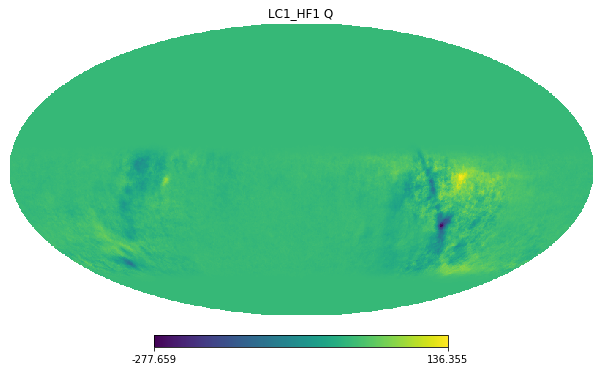

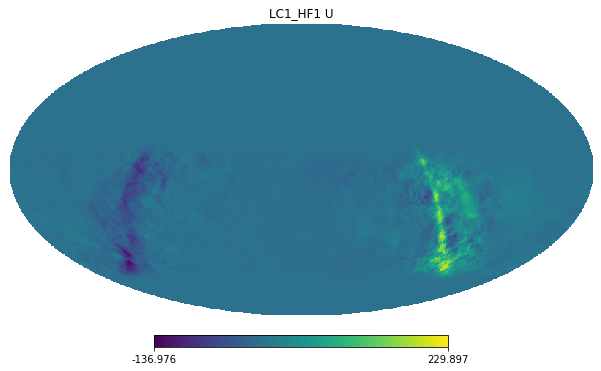

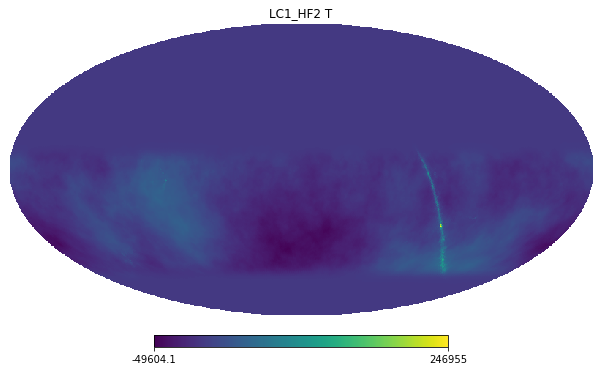

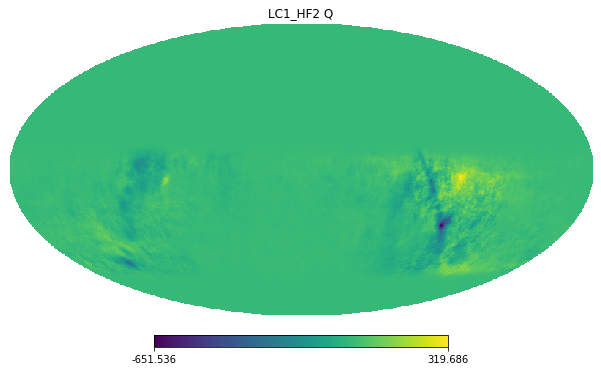

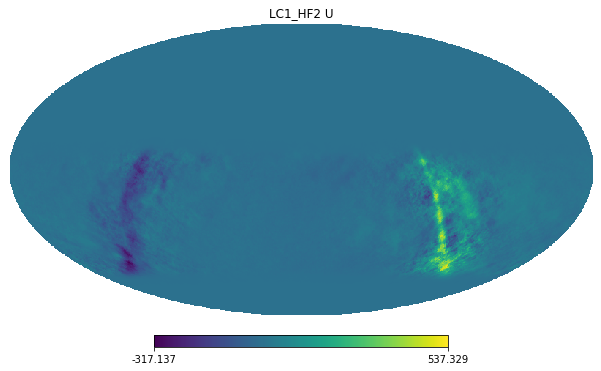

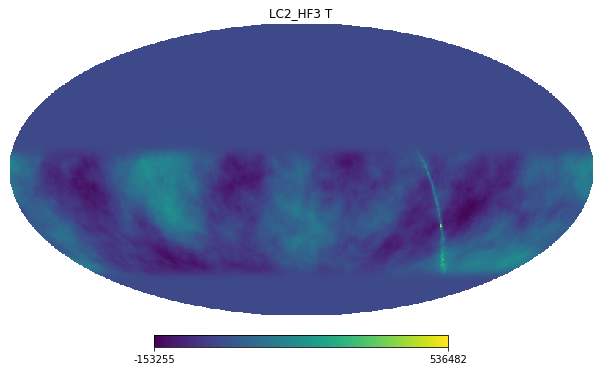

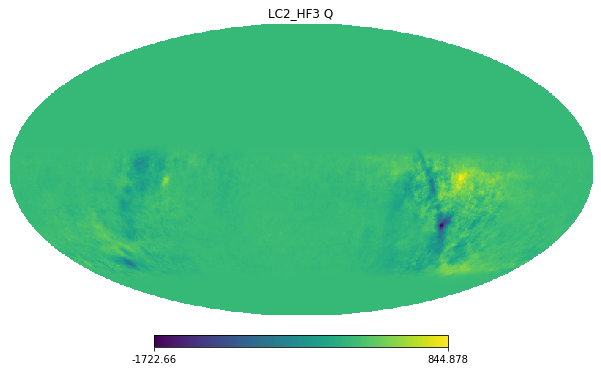

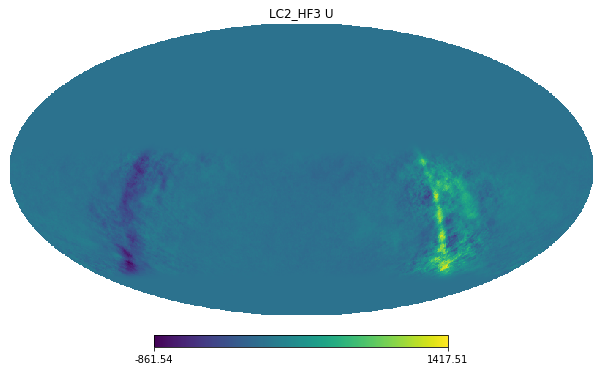

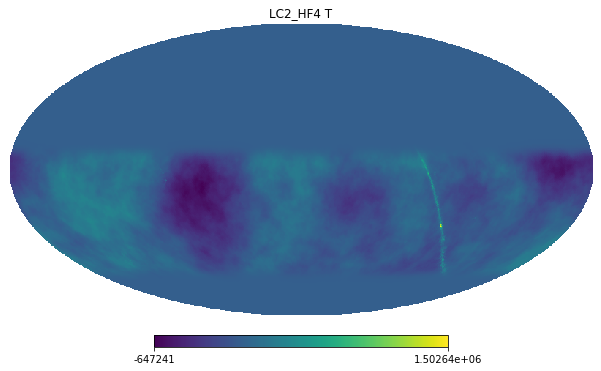

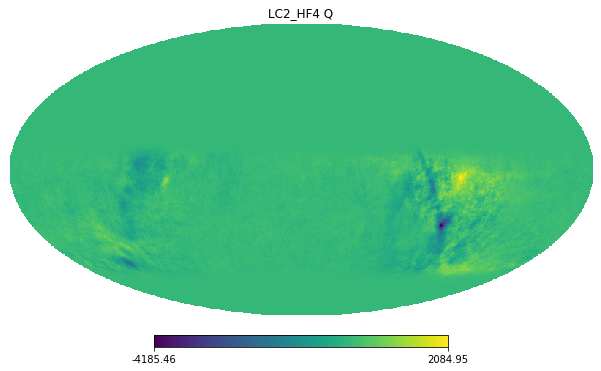

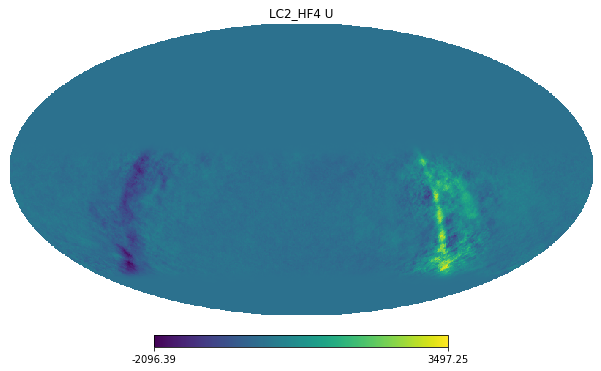

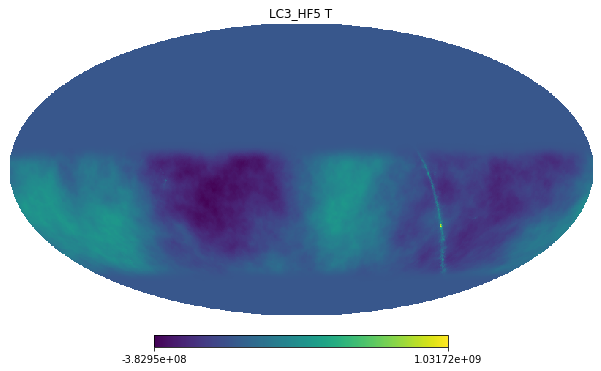

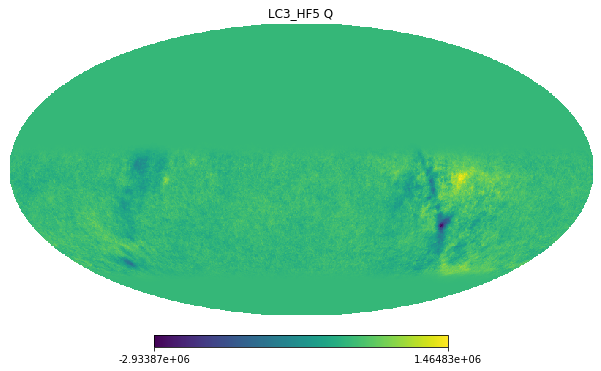

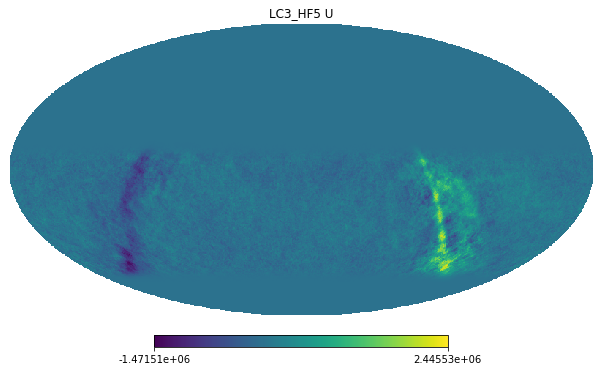

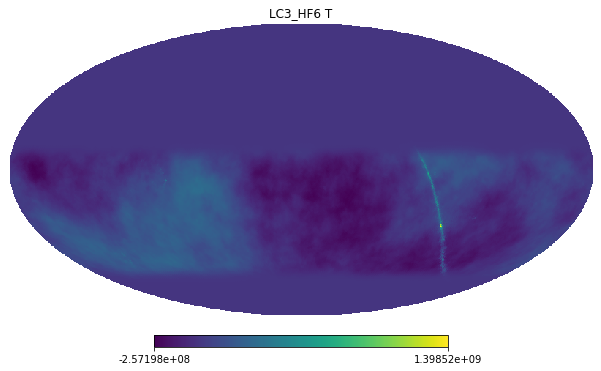

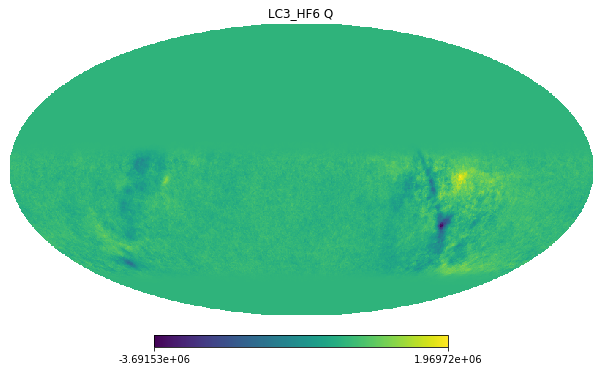

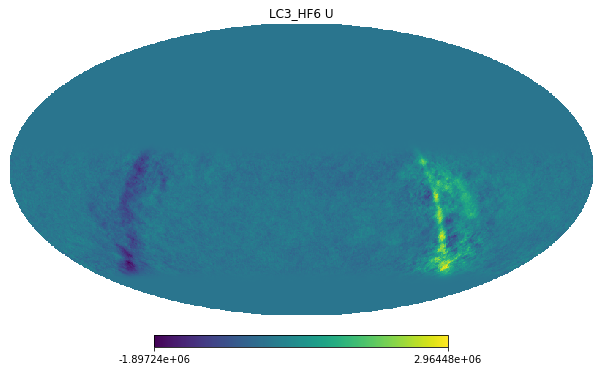

In [7]:
pols = ["T", "Q","U"]
for h in final:
    for k in h.keys():
        for pol in np.arange(h[k].shape[0]):
            hp.mollview(h[k][pol], title = str(k)+" "+pols[pol])
            plt.show()